In [1]:
import pandas as pd
import scipy.stats as stats
from scipy import stats
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Wilcoxon Paired T-test

Because I created several variables which capture the number of restaurant results observed around each bike station at four
different distances, 100m, 250m, 350m, and 500m, I can compare these results between Yelp and FourSquare using paired tests.

Because each bike station is related, comparing the results between each station is best done using a paired test. The variables are not normally distributed, so the Wilcoxon is robust to that.

### Load in the csv data

In [2]:
Helsinki_bikestation = pd.read_csv('Helsinki_bikestation.csv')
Helsinki_bikestation

,empty_slots,free_bikes,stn_id,latitude,longitude,station,timestamp,stn_dist_to_center_km,yelp_250,yelp_350,yelp_500,yelp_100,four_100_y,four_250_y,four_350_y,four_500_y,total_bikes
0,15,23,7f0baf8054547e62f029e717f4f1ea31,60.155445,24.950293,Kaivopuisto,2023-10-18T20:35:03.826000Z,2.001855,0,0,4,0,3,30,67,129,38
1,10,4,9260e3f88cfd9ede2dacf66685cc9595,60.160959,24.956347,Laivasillankatu,2023-10-18T20:35:03.845000Z,1.736349,0,0,3,0,2,22,44,97,14
2,4,14,d6df69b46a8a140b89af51eb17c69309,60.158189,24.944927,Kapteeninpuistikko,2023-10-18T20:35:03.861000Z,1.592994,8,13,25,2,6,44,85,184,18
3,10,6,fc993e236043e904c4d229a3806cb458,60.160986,24.941776,Viiskulma,2023-10-18T20:35:03.867000Z,1.236670,26,43,85,6,22,84,141,310,16
4,4,35,f21eedaefb3ce200e00b2f5ef79a86ed,60.162225,24.929710,Hietalahdentori,2023-10-18T20:35:03.875000Z,1.001732,23,43,72,8,26,81,153,270,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,15,1,bab45e7a1ef6f2643a32891f61000063,60.195260,24.900731,Kuusitie,2023-10-18T20:35:04.177000Z,3.220742,2,3,5,1,42,109,151,229,16
119,19,1,d62d22d4d4915a30713cd15020b182d9,60.188275,24.955976,Kustaankatu,2023-10-18T20:35:04.179000Z,2.311878,27,34,62,9,63,161,212,395,20
120,10,6,03cd48db7343b62ceeb8c62cefd71334,60.197533,24.899261,Tilkanvierto,2023-10-18T20:35:04.181000Z,3.477867,0,2,3,0,6,55,121,160,16
121,18,3,f22262af20d637ff4aa72678fb8f7663,60.194448,24.891118,Paciuksenkaari,2023-10-18T20:35:04.186000Z,3.473536,2,2,3,1,1,22,28,103,21


#### Create some datasets with a variety of different data included:

In [3]:
Helsinki_numeric = Helsinki_bikestation[['empty_slots','total_bikes','stn_dist_to_center_km','four_100_y','yelp_100','four_250_y',
                                         'yelp_250','four_350_y','yelp_350','four_500_y','yelp_500']]

In [4]:
Helsinki_yelpfour_bydist = Helsinki_bikestation[['stn_dist_to_center_km','four_100_y','yelp_100','four_250_y','yelp_250',
                                       'four_350_y','yelp_350','four_500_y','yelp_500']]

Sort this last one by stn_dist_to_center_km to help with some visualizations I put in the EDA process

In [5]:
exp_plot = Helsinki_yelpfour_bydist.sort_values(by="stn_dist_to_center_km")
exp_plot

,stn_dist_to_center_km,four_100_y,yelp_100,four_250_y,yelp_250,four_350_y,yelp_350,four_500_y,yelp_500
26,0.048506,53,4,180,20,364,70,560,140
22,0.162194,66,13,232,77,395,131,661,228
20,0.250876,57,2,193,46,356,108,670,208
64,0.278321,52,14,179,61,320,104,561,182
28,0.319828,30,7,96,12,226,21,418,53
...,...,...,...,...,...,...,...,...,...
109,3.347373,13,0,56,3,77,5,146,18
88,3.380350,3,0,32,5,131,7,249,9
110,3.398088,6,0,24,0,57,1,127,7
121,3.473536,1,1,22,2,28,2,103,3


And then pair this down to just the yelp and foursquare data for the Wilcoxon tests

In [6]:
exp3 = exp_plot[['four_100_y','yelp_100','four_250_y','yelp_250',
                                       'four_350_y','yelp_350','four_500_y','yelp_500']]

## The data is not normal:

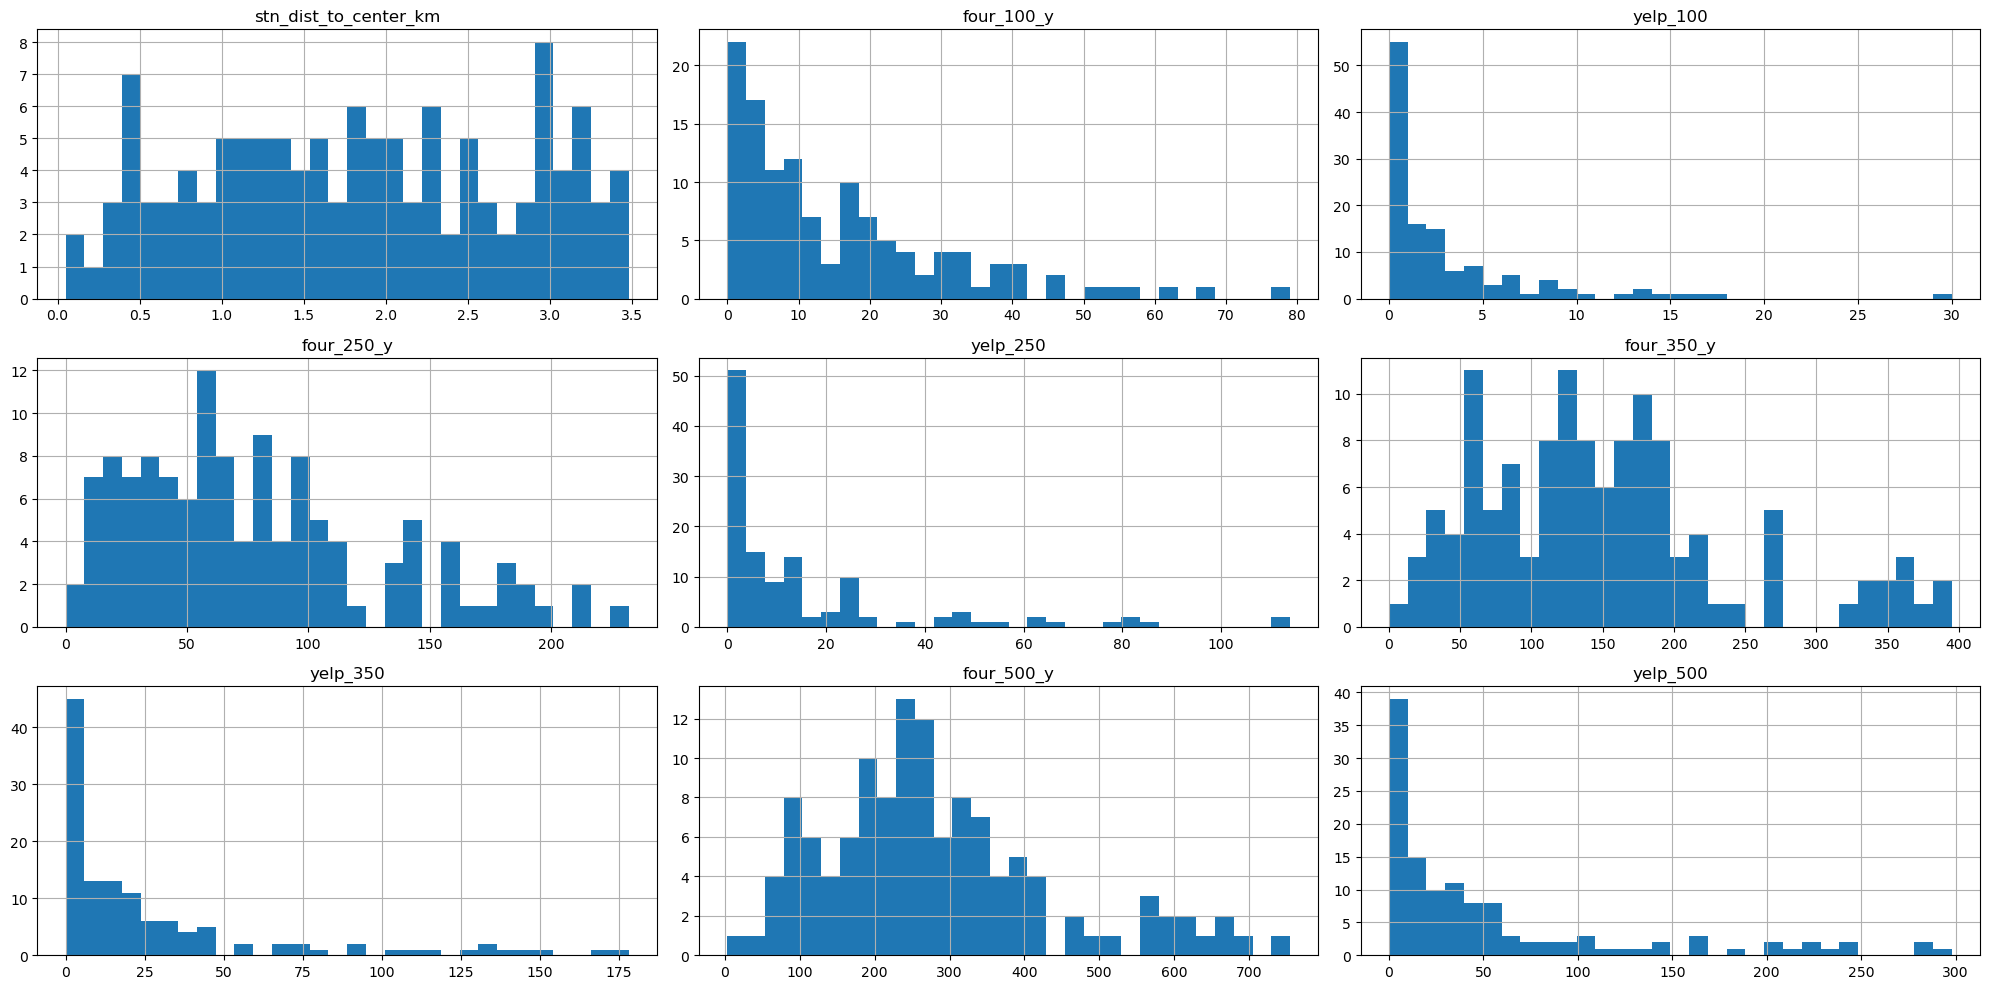

<Figure size 640x480 with 0 Axes>

In [7]:
exp_plot.hist(bins=30,figsize=(20, 10))
plt.tight_layout()
plt.show()
plt.savefig('eda_histograms.png')

In [8]:
stat, p = stats.shapiro(Helsinki_bikestation['stn_dist_to_center_km'])
print('%0.30f' % p)
stat, p = stats.shapiro(Helsinki_bikestation['empty_slots'])
print('%0.30f' % p)
stat, p = stats.shapiro(Helsinki_bikestation['four_500_y'])
print('%0.30f' % p)


0.000830990029498934745788574219
0.000022968990379013121128082275
0.000013498670341505203396081924


## First use traditional paired t-tests

In [9]:
#define samples
group1 = Helsinki_bikestation['four_100_y']
group2 = Helsinki_bikestation['yelp_100']

#perform independent two sample t-test
ttest_rel(group1, group2)

TtestResult(statistic=10.36644217650265, pvalue=1.91941597843672e-18, df=122)

In [10]:
#define samples
group1 = Helsinki_bikestation['four_250_y']
group2 = Helsinki_bikestation['yelp_250']

#perform independent two sample t-test
ttest_rel(group1, group2)

TtestResult(statistic=17.70454831978005, pvalue=1.6617019366041154e-35, df=122)

In [11]:
#define samples
group1 = Helsinki_bikestation['four_350_y']
group2 = Helsinki_bikestation['yelp_350']

#perform independent two sample t-test
ttest_rel(group1, group2)

TtestResult(statistic=22.68383815030334, pvalue=1.3713248315535227e-45, df=122)

In [12]:
#define samples
group1 = Helsinki_bikestation['four_500_y']
group2 = Helsinki_bikestation['yelp_500']

#perform independent two sample t-test
ttest_rel(group1, group2)

TtestResult(statistic=26.168052881382412, pvalue=7.065865090770815e-52, df=122)

All of these results indicate that there is a significant difference between the data gathered by Yelp and FourSquare, but just to be
sure, we can further perform the Wilcoxon test for non-normal data. Another alternative would be to transform the data to make it more
conform to a normal distribution, but if we're already getting significance with our nonparametric tests, we need not.

## Wilcoxon paired t-test

In [13]:
Wilcoxin = pd.DataFrame(Helsinki_bikestation[['four_100_y','yelp_100','four_250_y','yelp_250',
                                       'four_350_y','yelp_350','four_500_y','yelp_500']])
Wilcoxin['D_100'] = Wilcoxin['four_100_y'] - Wilcoxin['yelp_100']
Wilcoxin['D_250'] = Wilcoxin['four_250_y'] - Wilcoxin['yelp_250']
Wilcoxin['D_350'] = Wilcoxin['four_350_y'] - Wilcoxin['yelp_350']
Wilcoxin['D_500'] = Wilcoxin['four_500_y'] - Wilcoxin['yelp_500']
Wilcoxin

,four_100_y,yelp_100,four_250_y,yelp_250,four_350_y,yelp_350,four_500_y,yelp_500,D_100,D_250,D_350,D_500
0,3,0,30,0,67,0,129,4,3,30,67,125
1,2,0,22,0,44,0,97,3,2,22,44,94
2,6,2,44,8,85,13,184,25,4,36,72,159
3,22,6,84,26,141,43,310,85,16,58,98,225
4,26,8,81,23,153,43,270,72,18,58,110,198
...,...,...,...,...,...,...,...,...,...,...,...,...
118,42,1,109,2,151,3,229,5,41,107,148,224
119,63,9,161,27,212,34,395,62,54,134,178,333
120,6,0,55,0,121,2,160,3,6,55,119,157
121,1,1,22,2,28,2,103,3,0,20,26,100


In [14]:
group1 = Wilcoxin['four_100_y']
group2 = Wilcoxin['yelp_100']
 
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(group1, group2)

WilcoxonResult(statistic=84.5, pvalue=5.1498587644212393e-20)

In [15]:
group1 = Wilcoxin['four_250_y']
group2 = Wilcoxin['yelp_250']
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(group1, group2)

WilcoxonResult(statistic=2.0, pvalue=9.683409979049336e-22)

In [16]:
group1 = Wilcoxin['four_350_y']
group2 = Wilcoxin['yelp_350']
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(group1, group2)

WilcoxonResult(statistic=0.0, pvalue=9.227708448458534e-22)

In [17]:
group1 = Wilcoxin['four_500_y']
group2 = Wilcoxin['yelp_500']
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(group1, group2)

WilcoxonResult(statistic=0.0, pvalue=6.31935579070063e-22)

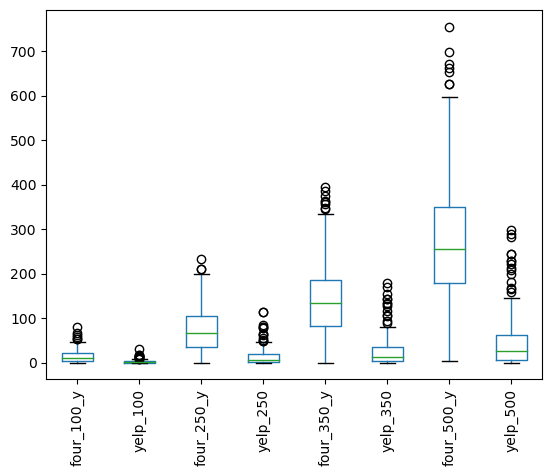

In [18]:
exp3.boxplot(grid=False)
plt.xticks(rotation=90)
plt.savefig('eda_boxplot.png')

Build a regression model.

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, datasets

In [26]:
Helsinki_bikestation.head(4)

,empty_slots,free_bikes,stn_id,latitude,longitude,station,timestamp,stn_dist_to_center_km,yelp_250,yelp_350,yelp_500,yelp_100,four_100_y,four_250_y,four_350_y,four_500_y,total_bikes
0,15,23,7f0baf8054547e62f029e717f4f1ea31,60.155445,24.950293,Kaivopuisto,2023-10-18T20:35:03.826000Z,2.001855,0,0,4,0,3,30,67,129,38
1,10,4,9260e3f88cfd9ede2dacf66685cc9595,60.160959,24.956347,Laivasillankatu,2023-10-18T20:35:03.845000Z,1.736349,0,0,3,0,2,22,44,97,14
2,4,14,d6df69b46a8a140b89af51eb17c69309,60.158189,24.944927,Kapteeninpuistikko,2023-10-18T20:35:03.861000Z,1.592994,8,13,25,2,6,44,85,184,18
3,10,6,fc993e236043e904c4d229a3806cb458,60.160986,24.941776,Viiskulma,2023-10-18T20:35:03.867000Z,1.236670,26,43,85,6,22,84,141,310,16


We need to tell the model where our x and y is located

In [31]:
x = Helsinki_bikestation[['stn_dist_to_center_km','four_500_y']]
x

,stn_dist_to_center_km,four_500_y
0,2.001855,129
1,1.736349,97
2,1.592994,184
3,1.236670,310
4,1.001732,270
...,...,...
118,3.220742,229
119,2.311878,395
120,3.477867,160
121,3.473536,103


In [28]:
y = Helsinki_bikestation['total_bikes']
y

0      38
1      14
2      18
3      16
4      39
       ..
118    16
119    20
120    16
121    21
122    22
Name: total_bikes, Length: 123, dtype: int64

And add the constant to x.

In [34]:
x = sm.add_constant(x)

In [36]:
lin_reg = sm.OLS(y,x)

In [37]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            total_bikes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6494
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.524
Time:                        06:59:16   Log-Likelihood:                -470.36
No. Observations:                 123   AIC:                             946.7
Df Residuals:                     120   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    28.42

This model does not perform well, and none of the variables of interest are significant within it. Therefore, using this model you cannot
predict the size of the bike station based on how many restaurants are 500m from it, nor how close it is to downtown.

I assume this is because of the phenomenon I observed earlier, which indicates that larger bike stations are located both inside downtown and outside downtown (you need to park the bike when you get home too), and that the density of restaurants is greater inside the downtown core than outside of it, so those two variables are likely highly correlated.

<Axes: xlabel='total_bikes', ylabel='stn_dist_to_center_km'>

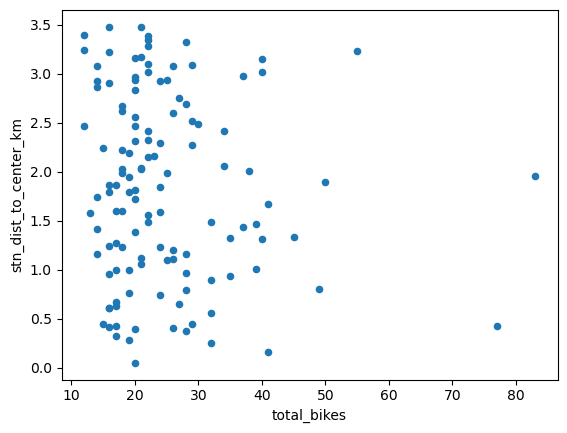

In [38]:
Helsinki_bikestation.plot.scatter('total_bikes', 'stn_dist_to_center_km')

Yes, this confirms visually that there is no relationshiop between total bikes at each station and distance from downtown

<Axes: xlabel='four_500_y', ylabel='total_bikes'>

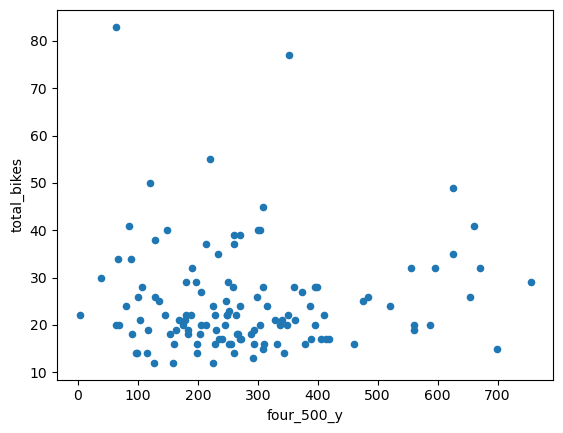

In [40]:
Helsinki_bikestation.plot.scatter('four_500_y', 'total_bikes')

<Axes: xlabel='four_500_y', ylabel='stn_dist_to_center_km'>

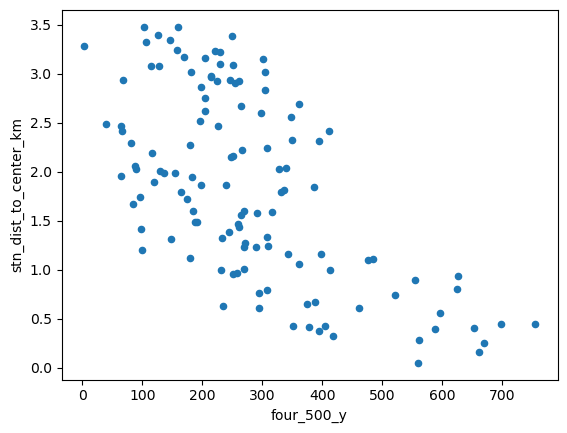

In [39]:
Helsinki_bikestation.plot.scatter('four_500_y', 'stn_dist_to_center_km')

As expected, it does look like there is a relationship between the two 'independent' variables.

# Stretch

How can you turn the regression model into a classification model?

Here, you could probably identify whether you were looking at yelp data or foursquare data if you had distance from the center of 
downtown and the number of bikes within whichever distance using a logistic regression. You'd need to make a dummy variable for 'API'
with each case either yes (yelp) or no (FourSquare), and use only one of the columns (ie. either 100m radius or 500m radius, etc.)

Because our predictors are not good at predicting anything here in this regression, it would be tough to classify the size of the bike
station depending on these variables, but you could do it if you split the bikestations into even categories (small station vs large station) - however you choose to define 'small' and 'large'.                                                                                 